<a href="https://colab.research.google.com/github/BryanBYChoi/GuessMotherTable/blob/master/%5Bto_keep%5D_Tutorial_Tensor_cnn_005change_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Basic Tutorials to CNN cifar10

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 47.7MB/s 
     |████████████████████████████████| 4.3MB 49.7MB/s 


In [ ]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:

train_images = train_images.reshape((-1, 32, 32, 3))
test_images = test_images.reshape((-1, 32, 32, 3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), padding='same', strides=1, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          16448     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          16448     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          1

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 64)          16448     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 5, 5, 64)          16448     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 64)        

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(train_images, train_labels,
          epochs=150,
          batch_size=16,
          validation_data=(test_images, test_labels))

model.save_weights('first_try.h5') 

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 129s 3ms/sample - loss: 0.9301 - accuracy: 0.6793 - val_loss: 1.0068 - val_accuracy: 0.6581
Epoch 2/150
50000/50000 [==============================] - 130s 3ms/sample - loss: 0.9091 - accuracy: 0.6829 - val_loss: 0.9911 - val_accuracy: 0.6761
Epoch 3/150
50000/50000 [==============================] - 131s 3ms/sample - loss: 0.8845 - accuracy: 0.6914 - val_loss: 1.0039 - val_accuracy: 0.6663
Epoch 4/150
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.8654 - accuracy: 0.7006 - val_loss: 1.0044 - val_accuracy: 0.6678
Epoch 5/150
50000/50000 [==============================] - 131s 3ms/sample - loss: 0.8473 - accuracy: 0.7083 - val_loss: 0.9995 - val_accuracy: 0.6694
Epoch 6/150
50000/50000 [==============================] - 131s 3ms/sample - loss: 0.8349 - accuracy: 0.7102 - val_loss: 0.9955 - val_accuracy: 0.6598
Epoch 7/150
50000/50000 [===================

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


10000/1 - 5s - loss: 1.6260 - accuracy: 0.4062


In [ ]:
print(test_acc)


0.4062


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


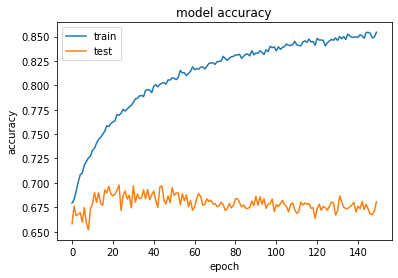

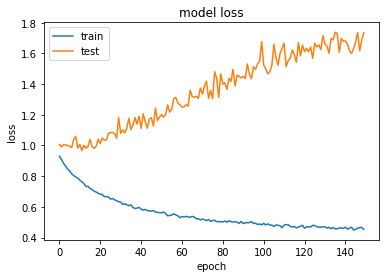

In [ ]:
import matplotlib.pyplot as plt

print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 

In [ ]:
opt = keras.optimizers.RMSprop()
len(opt.get_weights())

0